# Linear Regression on Boston Housing Dataset
### This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

# The description of all the features is given below:

### Input - 13  variables 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

PTRATIO pupil-teacher ratios per town (constant for all Boston tracts)


### Output 

MEDV: Median value of owner-occupied homes in $1000s
       

In [111]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

import torch
import torch.nn as nn
import torch.optim as optim



## Recap - Linear and LeLU

Applies a linear transformation to the incoming data: y = xA^T + b
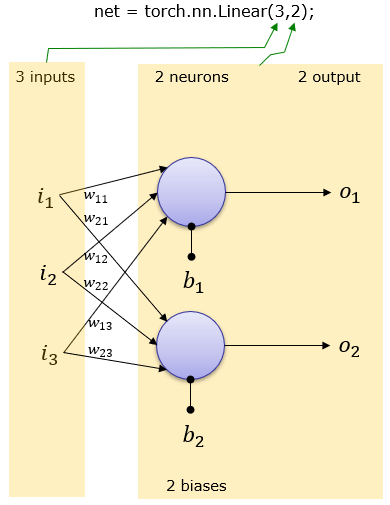

Applies a linear transformation to the incoming data: y = xA^T + b


ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x). Visually, it looks like the following:
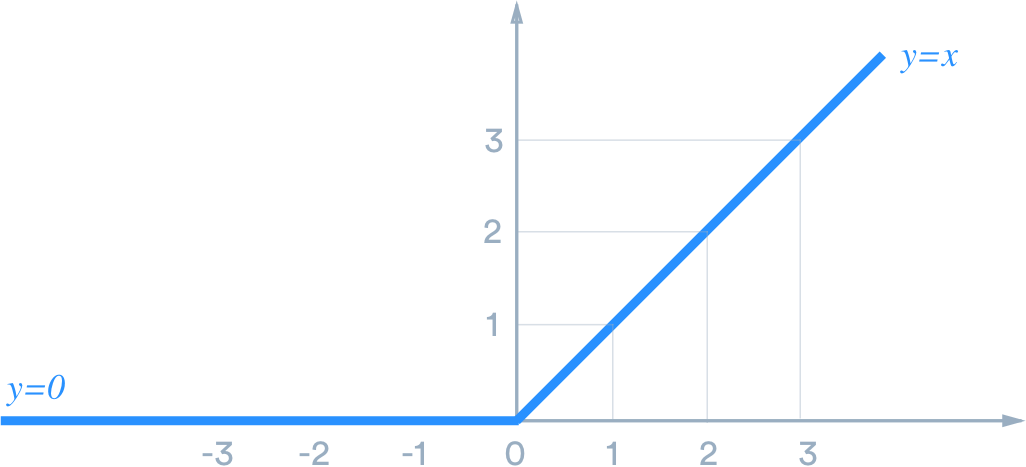

In [157]:
ln = nn.Linear(5, 10)
relu =nn.ReLU()

print(ln, type(ln))
random_x = torch.randn(5)
print(random_x)
y_ln = ln(random_x)
print(y_ln, type(y_ln), y_ln.shape)

y_relu = relu(y_ln)
print(y_relu, type(y_relu), y_relu.shape)


Linear(in_features=5, out_features=10, bias=True) <class 'torch.nn.modules.linear.Linear'>
tensor([-1.0547,  0.7938, -0.0703, -0.5899,  0.0912])
tensor([ 0.3958, -0.4314,  0.1732,  0.3662,  0.7426,  0.2682, -0.5099, -0.7098,
        -0.5527,  0.3541], grad_fn=<AddBackward0>) <class 'torch.Tensor'> torch.Size([10])
tensor([0.3958, 0.0000, 0.1732, 0.3662, 0.7426, 0.2682, 0.0000, 0.0000, 0.0000,
        0.3541], grad_fn=<ReluBackward0>) <class 'torch.Tensor'> torch.Size([10])


## Prepare train data

In [113]:
from sklearn.datasets import load_boston

boston = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


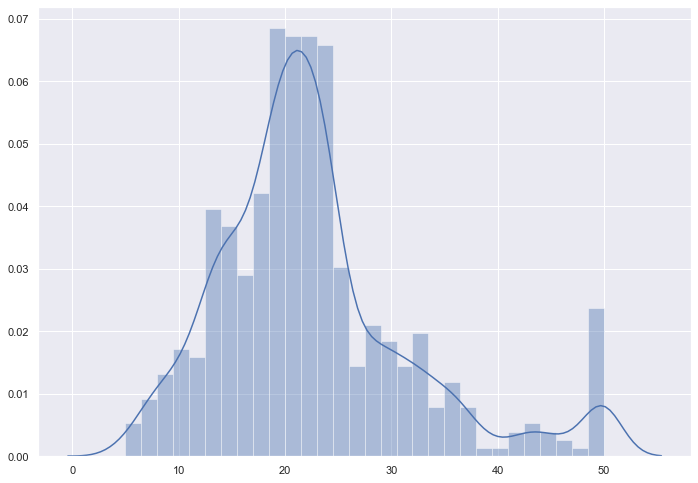

In [82]:

# feature_names -> ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_names = boston.feature_names
boston_dataframe = pd.DataFrame(boston.data, columns=feature_names)
print(boston_dataframe.head())

X = boston.data
Y = boston.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

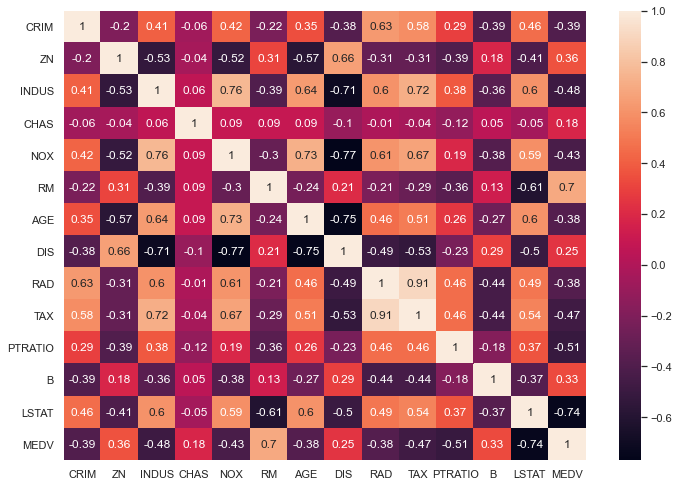

In [114]:
boston_dataframe['MEDV'] = boston.target
correlation_matrix = boston_dataframe.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

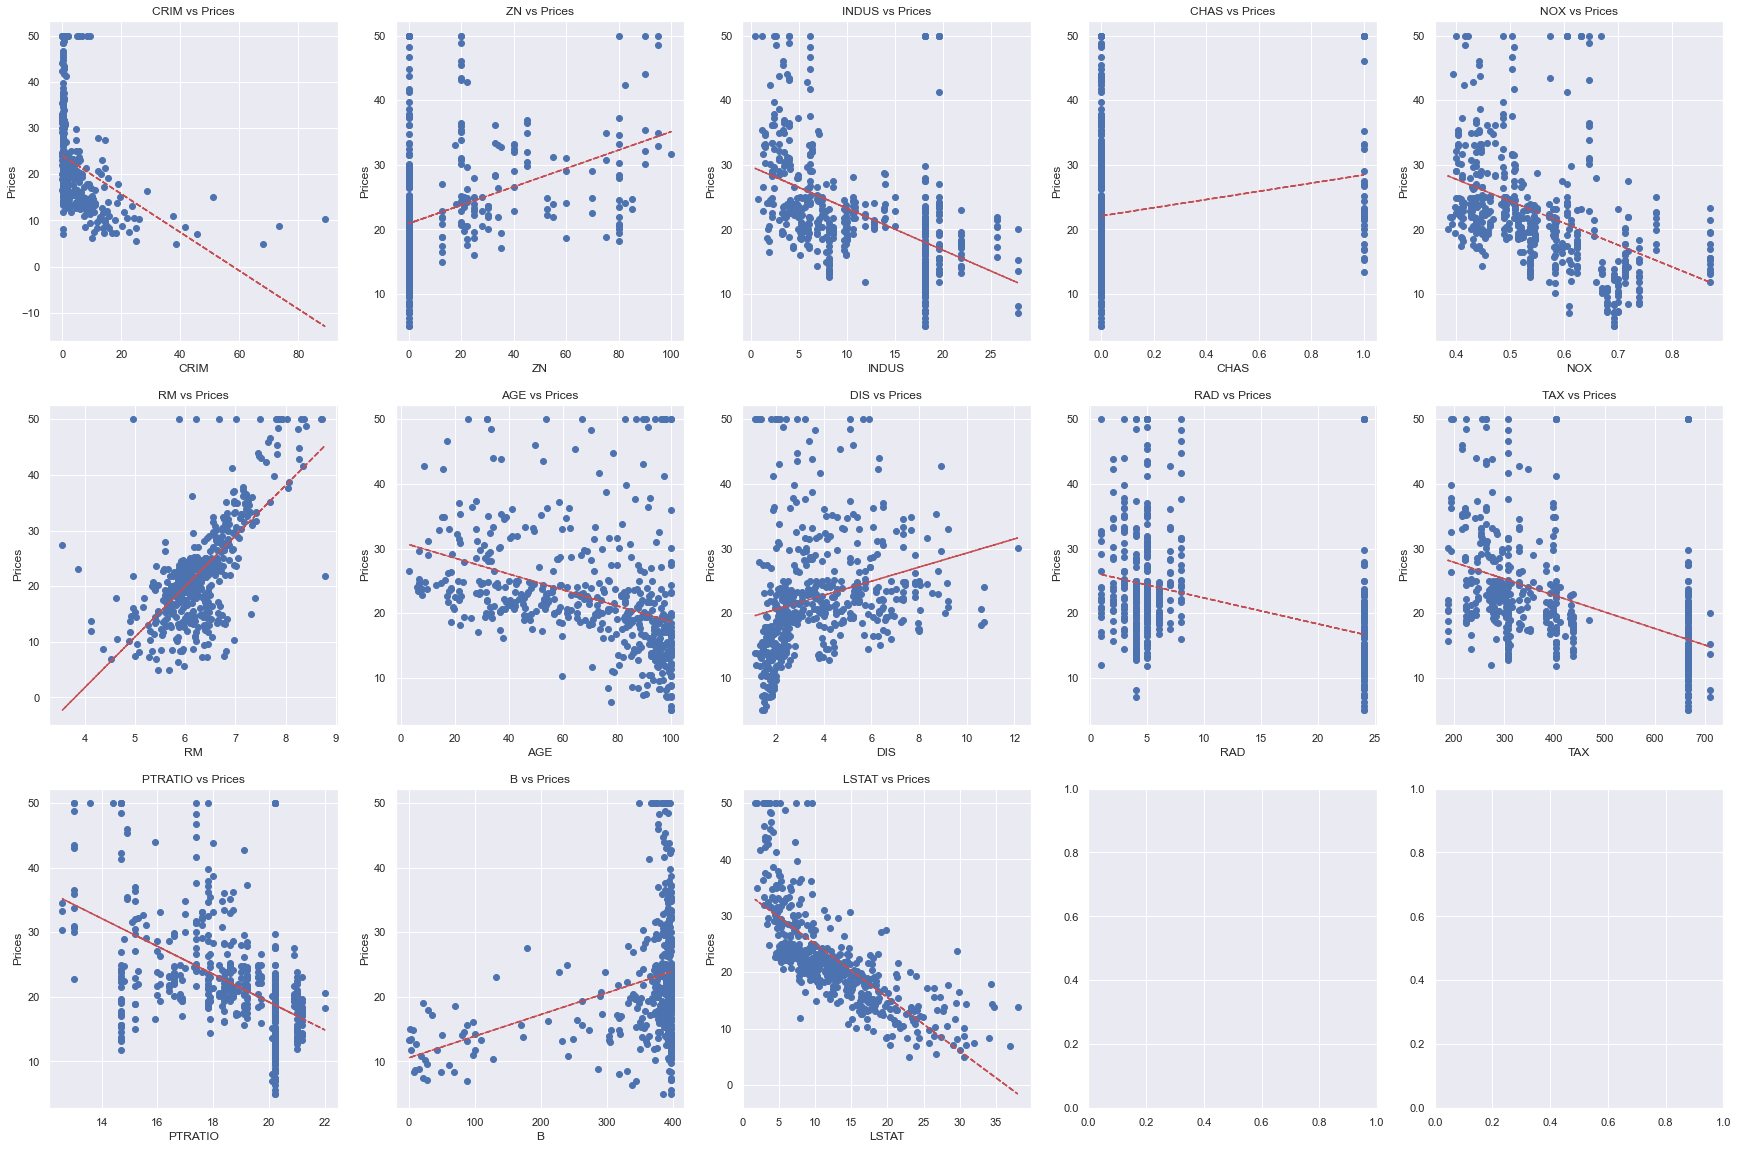

In [85]:
fig, axs = plt.subplots(nrows = 3, ncols=5, figsize=(30, 20))
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    x = X[:,i]
    pf = np.polyfit(x, Y, 1)
    p = np.poly1d(pf)

    ax.plot(x, Y, 'o')
    ax.plot(x, p(x),"r--")

    ax.set_title(col + ' vs Prices')
    ax.set_xlabel(col)
    ax.set_ylabel('Prices') 

In [115]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
Y_test = torch.tensor(Y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

(404, 13)
(102, 13)
(404,)
(102,)


## Define Model 
### Input : 13 variables, Output: House price, 3 hidden layers

In [116]:
class BostonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(13, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_hidden4)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))


In [117]:
model = BostonModel()

criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

## Train model

In [119]:
num_epochs = 300
learning_rate = 0.0001
size_hidden1 = 100
size_hidden2 = 50
size_hidden3 = 10
size_hidden4 = 1

losses =[]
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for inputs, labels in train_iter:
        optimizer.zero_grad()

        # get output from the model, given the inputs
        outputs = model(inputs)

        # defining loss
        loss = criterion(outputs, labels)
        losses.append(loss)

        # computing gradients
        loss.backward()
        # accumulating running loss
        running_loss += loss.item()
        losses.append(running_loss)
        # updated weights based on computed gradients
        optimizer.step()
    if epoch % 20 == 0:    
        print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
    running_loss = 0.0


Epoch [1]/[300] running accumulative loss across all batches: 11037.757
Epoch [21]/[300] running accumulative loss across all batches: 10686.205
Epoch [41]/[300] running accumulative loss across all batches: 10153.648
Epoch [61]/[300] running accumulative loss across all batches: 9598.763
Epoch [81]/[300] running accumulative loss across all batches: 9429.494
Epoch [101]/[300] running accumulative loss across all batches: 8945.474
Epoch [121]/[300] running accumulative loss across all batches: 8759.247
Epoch [141]/[300] running accumulative loss across all batches: 8340.655
Epoch [161]/[300] running accumulative loss across all batches: 8516.852
Epoch [181]/[300] running accumulative loss across all batches: 7988.151
Epoch [201]/[300] running accumulative loss across all batches: 7201.288
Epoch [221]/[300] running accumulative loss across all batches: 7260.938
Epoch [241]/[300] running accumulative loss across all batches: 6799.131
Epoch [261]/[300] running accumulative loss across all

## Verification

In [154]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(X_test)

print(X_test.shape)
print(Y_test.shape)
print(predicted.shape)

torch.Size([102, 13])
torch.Size([102, 1])
torch.Size([102, 1])


Text(0.5, 1.0, 'Predicted Price')

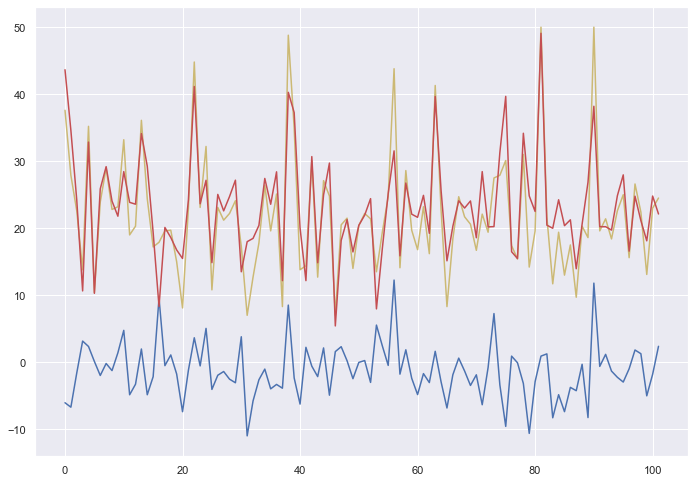

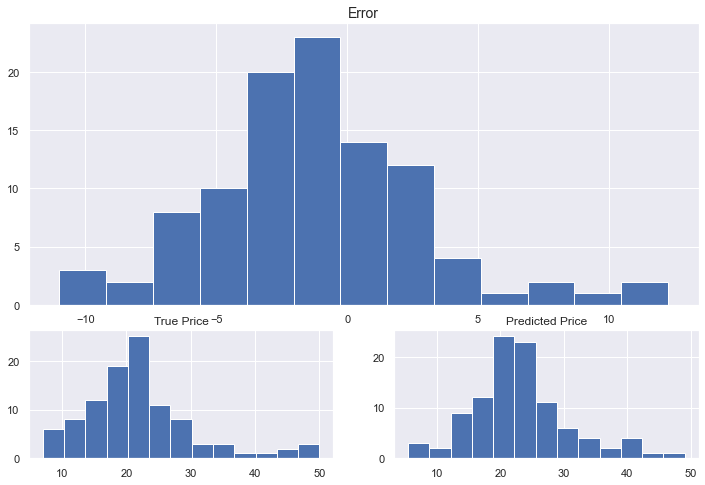

In [156]:
index = range(Y_test.numpy().shape[0])
plt.plot(index,Y_test.numpy()-predicted.numpy(),0)
plt.plot(index,Y_test.numpy(),'y')
plt.plot(index,predicted.numpy(),'r')

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))


ax1.set_title('Error', fontsize=14)
ax1.hist(Y_test.numpy()-predicted.numpy(),bins ='auto')

ax2.hist(Y_test.numpy(), bins='auto')
ax2.set_title('True Price', fontsize=12)

ax3.hist(predicted.numpy(), bins='auto')
ax3.set_title('Predicted Price', fontsize=12)
